In [1]:
# This file simulates trees

using PhyloNetworks
using PhyloPlots
using PhyloCoalSimulations
using Combinatorics
using Formatting
using Distributions

In [2]:
using CSV, DataFrames

function num_bipartitions(n)
    return 2^(n-1) - 1
end;

function get_nodes(idx)
    nodes = []
    for i in 1:length(idx)
        if idx[i]
            append!(nodes, i)
        end
    end
    return nodes
end


function get_bipartition(tree, n)
    taxa = sort(tipLabels(tree))
    if length(taxa) != n
        print("check the parameter n")
        return
    end
    node = Vector(1:n)
    result = []
    idx = 0
    for i in tree.edge
        node_idx = hardwiredCluster(i,taxa)
        branch_node = get_nodes(node_idx)
        
        # if branch seperates more than half nodes, we use the small part to get bipartition idx
        if (length(branch_node) > n ÷ 2)
             branch_node = sort(collect(setdiff(node,branch_node)))
        end
        
        # generate all possible combination with the same number of nodes
        comb = collect(combinations(Vector(1:n), length(branch_node)))
        for c in 1:length(comb)
            if comb[c] == branch_node
                # if the combination is the later, we need to find its first half
                if length(branch_node) > 1 && c > length(comb) ÷ 2
                    c = length(comb) - c + 1 
                end
                idx = c - 1
                break
            end
        end
        for j in 1:(length(branch_node) - 1)
            idx = idx + binomial(n,j)
        end
        push!(result,Pair(idx, i.length))
        idx = 0
    end
    return result
end;

function print_bipartition(trees, n)
    
    # build the table
    N = num_bipartitions(n)
    data = zeros(length(trees), N)
    treeNum = 1;
    # get existing index
    
    for i in trees
        bipart = get_bipartition(i, n)
        for j in 1:length(bipart)
            data[treeNum,(bipart[j][1] + 1)] += bipart[j][2]
        end
        treeNum+=1
    end
    return data
end;

function print_csv(path, n, target)
    tree = readMultiTopology(path)
    result = print_bipartition(tree, n)
    N = num_bipartitions(n)
    header = Vector(0:N - 1)
    header = string.(header)
    CSV.write(target, DataFrame(result, :auto),header = header) 
end;

In [3]:
tree_1 = "(((4:1.0, 3:1.0):1.0,2:1.0):1.0,1:1.0);"
tree_2 = "(((4:1.0, 2:1.0):1.0,3:1.0):1.0,1:1.0);"
tree_3 = "(((3:1.0, 2:1.0):1.0,4:1.0):1.0,1:1.0);"
tree_4 = "(((4:1.0, 3:1.0):1.0,1:1.0):1.0,2:1.0);"
tree_5 = "(((4:1.0, 1:1.0):1.0,3:1.0):1.0,2:1.0);"
tree_6 = "(((1:1.0, 3:1.0):1.0,4:1.0):1.0,2:1.0);"
tree_7 = "(((1:1.0, 2:1.0):1.0,4:1.0):1.0,3:1.0);"
tree_8 = "(((4:1.0, 2:1.0):1.0,1:1.0):1.0,3:1.0);"
tree_9 = "(((4:1.0, 1:1.0):1.0,2:1.0):1.0,3:1.0);"
tree_10 = "(((2:1.0, 1:1.0):1.0,3:1.0):1.0,4:1.0);"
tree_11 = "(((1:1.0, 3:1.0):1.0,2:1.0):1.0,4:1.0);"
tree_12 = "(((3:1.0, 2:1.0):1.0,1:1.0):1.0,4:1.0);"
tree_13 = "((4:1.0, 3:1.0):1.0,(2:1.0,1:1.0):1.0);"
tree_14 = "((4:1.0, 1:1.0):1.0,(2:1.0,3:1.0):1.0);"
tree_15 = "((4:1.0, 2:1.0):1.0,(3:1.0,1:1.0):1.0);"

"((4:1.0, 2:1.0):1.0,(3:1.0,1:1.0):1.0);"

In [4]:
trees_string = [tree_1,tree_2,tree_3,tree_4,tree_5,tree_6,tree_7,tree_8,tree_9,tree_10,tree_11,tree_12,tree_13,tree_14,tree_15];

In [5]:
using Random


function change_branch(newick_tree, seed)
    tree_1 = readTopology(newick_tree);
    tree_2 = readTopology(newick_tree);
    tree_3 = readTopology(newick_tree);
    tree_4 = readTopology(newick_tree);
    tree_5 = readTopology(newick_tree);
    tree_6 = readTopology(newick_tree);

    
    Random.seed!(seed)

    n=length(tree_1.edge)
    
    
    for e in tree_2.edge
        e.length += 0.5
    end
    
    a = rand(1:99, n)
    i = 1
    for e in tree_3.edge
        inc = a[i]/100
        e.length += inc
        e.length = round(e.length, digits = 2)
        i += 1
    end
    

    for e in tree_4.edge
        e.length -= 0.5
    end
    
    Random.seed!(seed + 10)
    a = rand(1:99, n)
    i = 1
    for e in tree_5.edge
        dec = a[i]/100
        e.length -= dec
        e.length = round(e.length, digits = 2)
        i += 1
    end
    
    Random.seed!(seed + 20)
    a = rand(-99:99, n)
    i = 1
    for e in tree_6.edge
        dec = a[i]/100
        e.length -= dec
        e.length = round(e.length, digits = 2)
        i += 1
    end
    
    trees = [tree_1,tree_2,tree_3,tree_4,tree_5,tree_6];
    return trees
end

change_branch (generic function with 1 method)

In [7]:
Random.seed!(123)
for k in 1:100
    for i in 1:length(trees_string)
        trees = change_branch(trees_string[i], 123+i+ k * 100)
        for j in 1:length(trees)
            tree = simulatecoalescent(trees[j], 100, 1);
            path = "./data/rawdata/4_taxa_" * string(i) * "_" * string(j) * "_100_" * string(k) * ".trees" 
            writeMultiTopology(tree, path)
            path = "./data/rawdata/4_taxa_" * string(i) * "_" * string(j) * "_100_" * string(k) * ".trees" 
            target = "data/4_taxa_" * string(i) * "_" * string(j) * "_100_" * string(k) * ".csv"
            print_csv(path, 4, target);
        end
    end
end

In [7]:
Random.seed!(123)
for k in 1:100
    for i in 1:length(trees_string)
        trees = change_branch(trees_string[i],1 + i + k * 100)
        for j in 1:length(trees)
            tree = simulatecoalescent(trees[j], 1000, 1);
            path = "./data/rawdata/4_taxa_" * string(i) * "_" * string(j) * "_1000_" * string(k) * ".trees" 
            writeMultiTopology(tree, path)
            path = "./data/rawdata/4_taxa_" * string(i) * "_" * string(j) * "_1000_" * string(k) * ".trees" 
            target = "data/4_taxa_" * string(i) * "_" * string(j) * "_1000_" * string(k) * ".csv"
            print_csv(path, 4, target);
        end
    end
end

In [8]:
Random.seed!(123)

for k in 1:100
    for i in 1:length(trees_string)
        trees = change_branch(trees_string[i],1 + i + k * 100)
        for j in 1:length(trees)
            tree = simulatecoalescent(trees[j], 5000, 1);
            path = "./data/rawdata/4_taxa_" * string(i) * "_" * string(j) * "_5000_" * string(k) * ".trees" 
            writeMultiTopology(tree, path)
            path = "./data/rawdata/4_taxa_" * string(i) * "_" * string(j) * "_5000_" * string(k) * ".trees" 
            target = "data/4_taxa_" * string(i) * "_" * string(j) * "_5000_" * string(k) * ".csv"
            print_csv(path, 4, target);
        end
    end
end

In [7]:
# different topologies with randomly chosen branch lengths Uniform (0.5, 2.0)

d = Uniform(-0.5, 1)
for i in 1:100
    for j in 1:length(trees_string)
        tree = readTopology(trees_string[j])
        Random.seed!((123+i)*j)
        n = length(tree.edge)

        x = rand(d, n)
        idx = 1
        for e in tree.edge
            e.length += x[idx]
            e.length = round(e.length, digits = 2)
            idx += 1
        end
        
        tree = simulatecoalescent(tree, 50, 1);        
        path = "./data/rawdata/4_diff_topo_" * string(j) *  "_50_" * string(i) * ".trees" 
        writeMultiTopology(tree, path)
        path = "./data/rawdata/4_diff_topo_" * string(j) *  "_50_" * string(i) * ".trees" 
        target = "data/4_diff_topo_" * string(j) *  "_50_" * string(i) * ".csv"
        print_csv(path, 4, target);
    end
end

In [9]:
d = Uniform(-0.5, 1)
for i in 1:100
    for j in 1:length(trees_string)
        tree = readTopology(trees_string[j])
        Random.seed!((123+i)*j)
        n = length(tree.edge)

        x = rand(d, n)
        idx = 1
        for e in tree.edge
            e.length += x[idx]
            e.length = round(e.length, digits = 2)
            idx += 1
        end
        
        tree = simulatecoalescent(tree, 100, 1);        
        path = "./data/rawdata/4_diff_topo_" * string(j) *  "_100_" * string(i) * ".trees" 
        writeMultiTopology(tree, path)
        path = "./data/rawdata/4_diff_topo_" * string(j) *  "_100_" * string(i) * ".trees" 
        target = "data/4_diff_topo_" * string(j) *  "_100_" * string(i) * ".csv"
        print_csv(path, 4, target);
    end
end

In [ ]:
# different topologies with randomly chosen branch lengths Uniform (0.5, 2.0)

d = Uniform(-0.5, 1)
for i in 1:100
    for j in 1:length(trees_string)
        tree = readTopology(trees_string[j])
        Random.seed!((123+i)*j)
        n = length(tree.edge)

        x = rand(d, n)
        idx = 1
        for e in tree.edge
            e.length += x[idx]
            e.length = round(e.length, digits = 2)
            idx += 1
        end
        
        tree = simulatecoalescent(tree, 500, 1);        
        path = "./data/rawdata/4_diff_topo_" * string(j) *  "_500_" * string(i) * ".trees" 
        writeMultiTopology(tree, path)
        path = "./data/rawdata/4_diff_topo_" * string(j) *  "_500_" * string(i) * ".trees" 
        target = "data/4_diff_topo_" * string(j) *  "_500_" * string(i) * ".csv"
        print_csv(path, 4, target);
    end
end

In [10]:
d = Uniform(-0.5, 1)
for i in 1:100
    for j in 1:length(trees_string)
        tree = readTopology(trees_string[j])
        Random.seed!((123+i)*j)
        n = length(tree.edge)

        x = rand(d, n)
        idx = 1
        for e in tree.edge
            e.length += x[idx]
            e.length = round(e.length, digits = 2)
            idx += 1
        end
        
        tree = simulatecoalescent(tree, 1000, 1);        
        path = "./data/rawdata/4_diff_topo_" * string(j) *  "_1000_" * string(i) * ".trees" 
        writeMultiTopology(tree, path)
        path = "./data/rawdata/4_diff_topo_" * string(j) *  "_1000_" * string(i) * ".trees" 
        target = "data/4_diff_topo_" * string(j) *  "_1000_" * string(i) * ".csv"
        print_csv(path, 4, target);
    end
end

In [6]:
d = Uniform(-0.5, 1)
for i in 1:100
    for j in 1:length(trees_string)
        tree = readTopology(trees_string[j])
        Random.seed!((123+i)*j)
        n = length(tree.edge)

        x = rand(d, n)
        idx = 1
        for e in tree.edge
            e.length += x[idx]
            e.length = round(e.length, digits = 2)
            idx += 1
        end
        
        tree = simulatecoalescent(tree, 5000, 1);        
        path = "./data/rawdata/4_diff_topo_" * string(j) *  "_5000_" * string(i) * ".trees" 
        writeMultiTopology(tree, path)
        path = "./data/rawdata/4_diff_topo_" * string(j) *  "_5000_" * string(i) * ".trees" 
        target = "data/4_diff_topo_" * string(j) *  "_5000_" * string(i) * ".csv"
        print_csv(path, 4, target);
    end
end

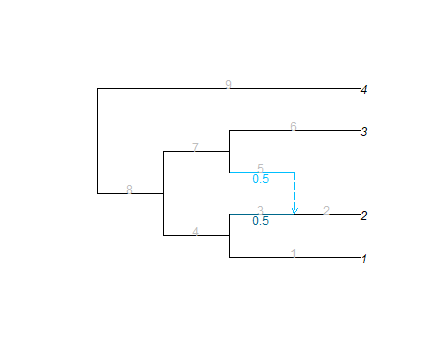

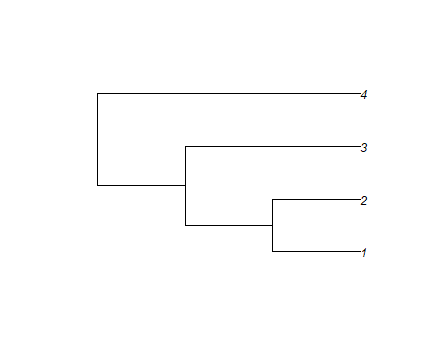

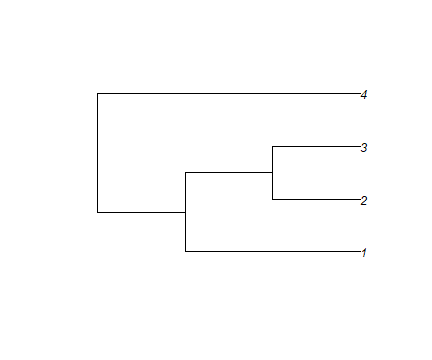

In [3]:
net = readTopology("(((1:1.0,(2:0.5)#H1:0.5::0.5):1.0,(#H1:0.5::0.5, 3:0.5)):1.0,4:1.0);");
plot(net,showgamma=true, showedgenumber=true,);
tree_p1 = readTopology("(((1:1.0,2:1.0):1.0, 3:1.0):1.0,4:1.0);");
plot(tree_p1);
tree_p2 = readTopology("((1:1.0,(2:1.0, 3:1.0):1.0):1.0,4:1.0);");
plot(tree_p2);

In [13]:
network = simulatecoalescent(net, 400, 1)
writeMultiTopology(network, "./data/rawdata/network.trees")
print_csv("./data/rawdata/network.trees", 4, "./data/network.csv");
tree_1 = simulatecoalescent(tree_p1, 200, 1)
writeMultiTopology(tree_1, "./data/rawdata/network_tree_1.trees")
print_csv("./data/rawdata/network_tree_1.trees", 4, "./data/network_tree_1.csv");
tree_2 = simulatecoalescent(tree_p2, 200, 1)
writeMultiTopology(tree_2, "./data/rawdata/network_tree_2.trees")
print_csv("./data/rawdata/network_tree_2.trees", 4, "./data/network_tree_2.csv");